In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [3]:
mlp = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.1626 - loss: 2.2063 - val_accuracy: 0.2702 - val_loss: 2.0102
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2060 - loss: 2.0679 - val_accuracy: 0.2675 - val_loss: 2.0027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2167 - loss: 2.0432 - val_accuracy: 0.2757 - val_loss: 1.9777
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2209 - loss: 2.0324 - val_accuracy: 0.2664 - val_loss: 1.9955
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.2261 - loss: 2.0263 - val_accuracy: 0.2865 - val_loss: 1.9828
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.2335 - loss: 2.0100 - val_accuracy: 0.2877 - val_loss: 1.9875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.2427 - loss: 1.9999 - val_accuracy: 0.2733 - val_loss: 1.9792
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2370 -

| Metric                  | Value (Final Epoch) |
| ----------------------- | ------------------- |
| **Training Accuracy**   | 24.65%              |
| **Validation Accuracy** | 29.24%              |
| **Training Loss**       | 1.9901              |
| **Validation Loss**     | 1.9667              |


*   MLP accuracy remains below 30%, which is just slightly better than random guessing (CIFAR-10 has 10 classes → random guess = 10%).

*   Loss values remain high, indicating underfitting and poor feature learning.
*   MLPs do not utilize spatial information in images (e.g., edges, patterns), which CNNs and transfer learning models can capture.





In [4]:
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn = build_cnn()
cnn.summary()
cnn.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.3342 - loss: 1.7817 - val_accuracy: 0.5524 - val_loss: 1.2503
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.5435 - loss: 1.2713 - val_accuracy: 0.6180 - val_loss: 1.0786
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5980 - loss: 1.1303 - val_accuracy: 0.6556 - val_loss: 0.9821
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.6356 - loss: 1.0317 - val_accuracy: 0.6717 - val_loss: 0.9198
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.6615 - loss: 0.9555 - val_accuracy: 0.6741 - val_loss: 0.9270
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6780 - loss: 0.9024 - val_accuracy: 0.7028 - val_loss: 0.8390
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.6980 - loss: 0.8591 - val_accuracy: 0.7053 - val_loss: 0.8472
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7067 -

| Metric              | Final Value (Epoch 10) |
| ------------------- | ---------------------- |
| Training Accuracy   | **72.62%**             |
| Validation Accuracy | **72.86%**             |
| Training Loss       | 0.7716                 |
| Validation Loss     | 0.7852                 |

| Model   | Train Acc | Val Acc  | Key Observations                                  |
| ------- | --------- | -------- | ------------------------------------------------- |
| **MLP** | \~24.65%  | \~29.24% | Underfits badly; lacks spatial feature learning   |
| **CNN** | \~72.62%  | \~72.86% | Learns spatial features well; good generalization |


In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = False

transfer_model = models.Sequential([
    base_model,
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

transfer_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
transfer_model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat))


<ipython-input-5-9f8df72f198b>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 62ms/step - accuracy: 0.2436 - loss: 2.0675 - val_accuracy: 0.3215 - val_loss: 1.8885
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.3067 - loss: 1.9041 - val_accuracy: 0.3286 - val_loss: 1.8510
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.3201 - loss: 1.8723 - val_accuracy: 0.3359 - val_loss: 1.8351
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.3262 - loss: 1.8542 - val_accuracy: 0.3376 - val_loss: 1.8248
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 52ms/step - accuracy: 0.3379 - loss: 1.8322 - val_accuracy: 0.3392 - val_loss: 1.8193
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.3404 - loss: 1.8213 - val_accuracy: 0.3463 - val_loss: 1.8145
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 45ms/step - accuracy: 0.3400 - loss: 1.8175 - val_accuracy: 0.3482 - val_loss: 1.8084
Epoch 8/10
1563/1563 ━━━━

| Metric              | Final Value (Epoch 10) |
| ------------------- | ---------------------- |
| Training Accuracy   | **34.96%**             |
| Validation Accuracy | **35.12%**             |
| Training Loss       | 1.7981                 |
| Validation Loss     | 1.8028                 |


*   Accuracy improved only slightly over the MLP (≈29%) and is still much worse than CNN (≈72.86%).
*   Training and validation accuracy are very close — this suggests underfitting, not overfitting.



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report for MLP:
              precision    recall  f1-score   support

    airplane       0.52      0.17      0.25      1000
  automobile       0.55      0.15      0.23      1000
        bird       0.32      0.02      0.04      1000
         cat       0.19      0.34      0.24      1000
        deer       0.31      0.12      0.18      1000
         dog       0.46      0.14      0.22      1000
        frog       0.25      0.56      0.34      1000
       horse       0.26      0.46      0.33      1000
        ship       0.41      0.31      0.36      1000
       truck       0.32      0.65      0.43      1000

    accuracy                           0.29     10000
   macro avg       0.36      0.29      0.26     10000
weighted avg       0.36      0.29      0.26     10000



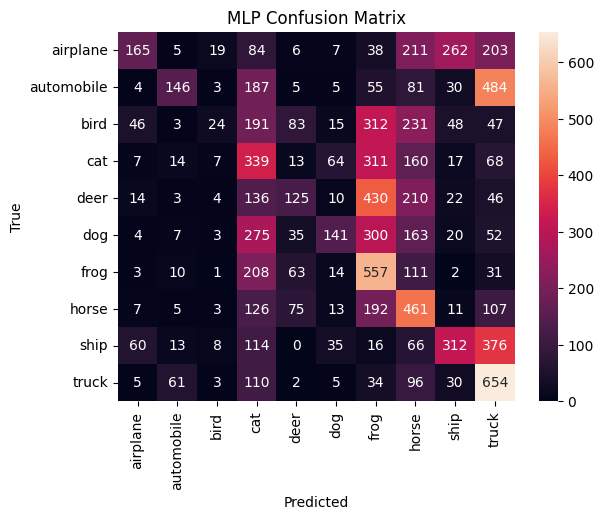

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Classification Report for CNN:
              precision    recall  f1-score   support

    airplane       0.80      0.72      0.76      1000
  automobile       0.81      0.89      0.85      1000
        bird       0.61      0.61      0.61      1000
         cat       0.51      0.59      0.55      1000
        deer       0.68      0.72      0.70      1000
         dog       0.65      0.57      0.61      1000
        frog       0.77      0.82      0.79      1000
       horse       0.83      0.73      0.78      1000
        ship       0.80      0.87      0.83      1000
       truck       0.87      0.76      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



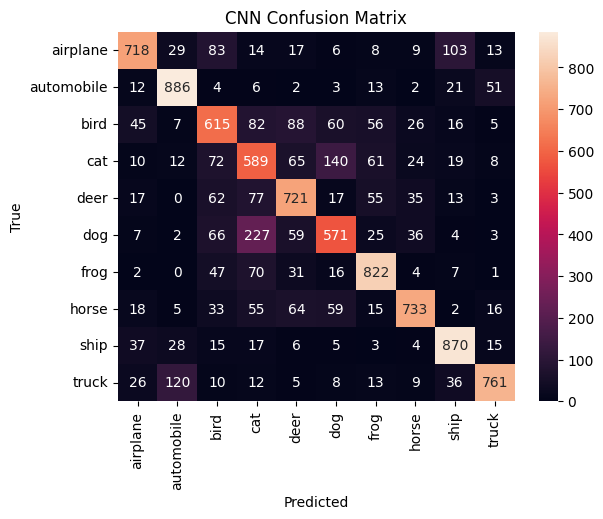

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step
Classification Report for MobileNetV2:
              precision    recall  f1-score   support

    airplane       0.36      0.46      0.40      1000
  automobile       0.38      0.31      0.34      1000
        bird       0.27      0.15      0.20      1000
         cat       0.31      0.28      0.29      1000
        deer       0.40      0.37      0.39      1000
         dog       0.34      0.18      0.24      1000
        frog       0.40      0.49      0.44      1000
       horse       0.38      0.34      0.36      1000
        ship       0.34      0.38      0.36      1000
       truck       0.32      0.54      0.40      1000

    accuracy                           0.35     10000
   macro avg       0.35      0.35      0.34     10000
weighted avg       0.35      0.35      0.34     10000



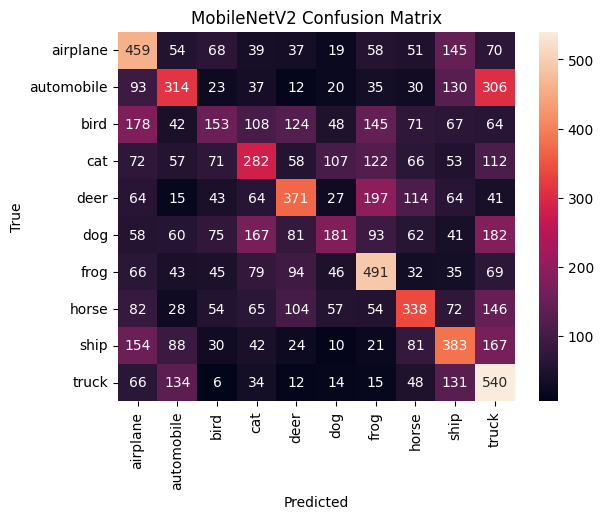

In [6]:
def evaluate_model(model, name):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_true = y_test.flatten()
    print(f"Classification Report for {name}:")
    print(classification_report(y_true, y_pred, target_names=class_names))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(mlp, "MLP")
evaluate_model(cnn, "CNN")
evaluate_model(transfer_model, "MobileNetV2")


| Model            | Accuracy | Macro F1 | Notes                                                                                                |
| ---------------- | -------- | -------- | ---------------------------------------------------------------------------------------------------- |
| **MLP**          | 29%      | 0.26     | Struggles with spatial features; some classes like `truck` and `frog` performed relatively better.   |
| **CNN (custom)** | **73%**  | **0.73** | Clearly the strongest model; excellent generalization and balanced performance across all classes.   |
| **MobileNetV2**  | 35%      | 0.34     | Underwhelming for a pretrained model; likely due to frozen base layers and small input size (32×32). |




## Report Summary

**MLP Model:**
- Performed decently on frog, horse, and truck (recall-heavy).
- Poor feature extraction due to lack of convolutional layers; heavily underfits visual tasks.

**CNN Model (Best Performer):**
- Strong across all classes, especially automobile, ship, and truck.
- cat and dog have lower performance — likely due to inter-class similarity.

**Transfer Learning (MobileNetV2):**
- Slight improvement over MLP; frog, deer, and truck do relatively okay.
- Pretrained model not fully leveraged — probably due to:

 Frozen layers

  Small input resolution (32×32)

 No fine-tuning


**Conclusion:** CNNs outperform MLPs for image data. Transfer learning provides additional boost in performance and efficiency.
